# Baby Names
- Load social security data about baby names
- analyze popularity over years
- compute 10 most popular names for a year
- identify name fads
- identify most-used unisex names

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pp
import seaborn

%matplotlib inline

# Extract files from zip

In [2]:
import zipfile
zipfile.ZipFile('names.zip').extractall('.')

import os
os.listdir('names')

['yob2000.txt',
 'yob2014.txt',
 'yob1938.txt',
 'yob1910.txt',
 'yob1904.txt',
 'yob1905.txt',
 'yob1911.txt',
 'yob1939.txt',
 'yob2001.txt',
 'yob2003.txt',
 'yob1907.txt',
 'yob1913.txt',
 'yob1898.txt',
 'yob1899.txt',
 'yob1912.txt',
 'yob1906.txt',
 'yob2002.txt',
 'yob2012.txt',
 'yob2006.txt',
 'yob1902.txt',
 'yob1916.txt',
 'yob1889.txt',
 'yob1888.txt',
 'yob1917.txt',
 'yob1903.txt',
 'yob2007.txt',
 'yob2013.txt',
 'yob2005.txt',
 'yob2011.txt',
 'yob1915.txt',
 'yob1901.txt',
 'yob1929.txt',
 'yob1928.txt',
 'yob1900.txt',
 'yob1914.txt',
 'yob2010.txt',
 'yob2004.txt',
 'yob1973.txt',
 'yob1967.txt',
 'yob1998.txt',
 'yob1999.txt',
 'yob1966.txt',
 'yob1972.txt',
 'yob1958.txt',
 'yob1964.txt',
 'yob1970.txt',
 'yob1971.txt',
 'yob1965.txt',
 'yob1959.txt',
 'yob1961.txt',
 'yob1975.txt',
 'yob1949.txt',
 'yob1948.txt',
 'yob1974.txt',
 'yob1960.txt',
 'yob1976.txt',
 'yob1962.txt',
 'yob1989.txt',
 'yob1988.txt',
 'yob1963.txt',
 'yob1977.txt',
 'yob1952.txt',
 'yob194

In [3]:
open('names/yob2011.txt','r').readlines()[:10]

['Sophia,F,21816\n',
 'Isabella,F,19870\n',
 'Emma,F,18777\n',
 'Olivia,F,17294\n',
 'Ava,F,15480\n',
 'Emily,F,14236\n',
 'Abigail,F,13229\n',
 'Madison,F,12360\n',
 'Mia,F,11512\n',
 'Chloe,F,10970\n']

In [4]:
names11 = pd.read_csv('names/yob2011.txt')

In [5]:
names11.head(10)

,Sophia,F,21816
0,Isabella,F,19870
1,Emma,F,18777
2,Olivia,F,17294
3,Ava,F,15480
4,Emily,F,14236
5,Abigail,F,13229
6,Madison,F,12360
7,Mia,F,11512
8,Chloe,F,10970
9,Elizabeth,F,10062


In [6]:
#it didn't have col names lets try again with named columns
names11 = pd.read_csv('names/yob2011.txt',names=['Name','Sex','Number'])

In [7]:
names11.head(10)

,Name,Sex,Number
0,Sophia,F,21816
1,Isabella,F,19870
2,Emma,F,18777
3,Olivia,F,17294
4,Ava,F,15480
5,Emily,F,14236
6,Abigail,F,13229
7,Madison,F,12360
8,Mia,F,11512
9,Chloe,F,10970


In [8]:
#personal query of how many babies born
names11[names11['Sex']=='F']['Number'].sum() + names11[names11['Sex']=='M']['Number'].sum()

3646730

In [9]:
#load all the data
names = []
for year in range(1880,2014+1):
    names.append(pd.read_csv('names/yob{}.txt'.format(year),names=['Name','Sex','Number']))
    names[-1]['Year'] = year

all_years = pd.concat(names)

In [10]:
all_years.head()

,Name,Sex,Number,Year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880


In [11]:
all_years.tail()

,Name,Sex,Number,Year
33039,Zykeem,M,5,2014
33040,Zymeer,M,5,2014
33041,Zymiere,M,5,2014
33042,Zyran,M,5,2014
33043,Zyrin,M,5,2014


# Now we have all data
- lets extract some analytics about it
- track name popularity

In [12]:
years_indexes = all_years.set_index(['Sex','Name','Year']).sort_index()

In [13]:
years_indexes

Number
Sex Name      Year        
F   Aabha     2011       7
              2012       5
              2014       9
    Aabriella 2008       5
              2014       5
    Aaden     2009       5
    Aadhira   2012       6
              2013      10
              2014      13
    Aadhya    2007      10
              2008       9
              2009      18
              2010      19
              2011      52
              2012     110
              2013     172
              2014     249
    Aadi      2006       5
              2012       5
              2013       6
    Aadison   2009       6
              2012       5
    Aaditri   2010       5
              2012       5
              2013       6
              2014      10
    Aadrika   2013       5
              2014       5
    Aadvika   2013       6
              2014       7
...                    ...
M   Zyshawn   2008      14
              2009       7
              2010       9
              2011       5
              2012      10
              2013      13
              2014       6
    Zyshon    1998       8
              2001       6
              2005       5
    Zyshonne  1998      26
              1999      30
              2000      17
              2001      12
              2002       9
              2003       7
    Zytaevius 2012       5
    Zytaveon  2011       8
              2014       7
    Zytavion  2011       5
    Zytavious 2002       6
              2004       6
              2005       5
              2006       7
              2007       6
              2009       7
              2010       6
    Zyvion    2009       5
    Zyyon     2014       6
    Zzyzx     2010       5

[1825433 rows x 1 columns]

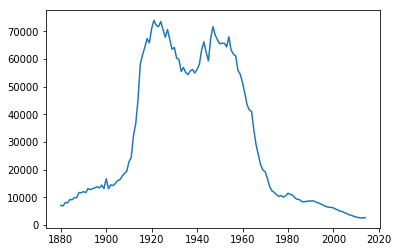

In [14]:
a = years_indexes.loc['F','Mary']
pp.plot(a.index,a.values)

In [15]:
#plot a name over all years
def plotName(sex,name):
    data = years_indexes.loc[sex,name]
    
    pp.plot(data.index,data.values)

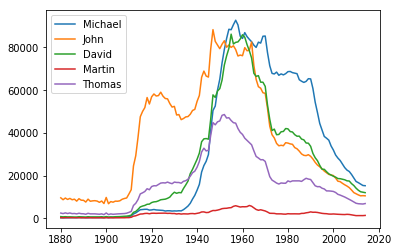

In [24]:
names =['Michael','John','David','Martin','Thomas']
for name in names:
    plotName('M',name)
pp.legend(names)

In [19]:
#unstack promotes the index values to column values
years_indexes.loc['F'].loc[names].unstack(level=0).head()

Number                            
Name  David  John Martin Michael Thomas
Year                                   
1880    NaN  46.0    NaN     NaN    8.0
1881    NaN  26.0    NaN     NaN   11.0
1882    NaN  40.0    NaN     NaN   12.0
1883    6.0  40.0    NaN     NaN    NaN
1884    NaN  40.0    NaN     NaN   10.0

In [22]:
#replace NaN with 0
variants = years_indexes.loc['M'].loc[names].unstack(level=0).fillna(0)

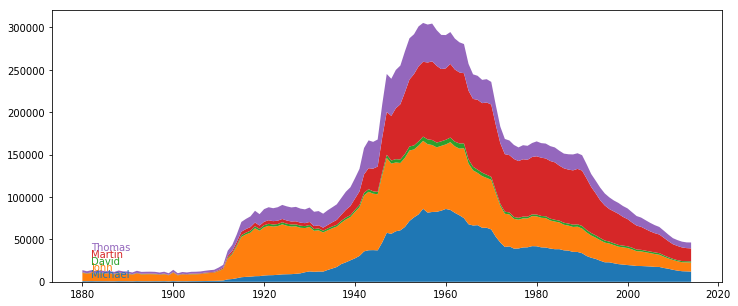

In [53]:
#add some styling
palette = seaborn.color_palette()
pp.figure(figsize=(12,5))
pp.stackplot(variants.index,variants.values.T,colors=palette)

for z,name in enumerate(names):
    pp.text(1882,5000 + 8000 * z,name,color=palette[z])

In [70]:
#extract popular names
years_indexes.loc['M',:,2008].sort_values('Number',ascending=False).head(10)

Number
Sex Name        Year        
M   Jacob       2008   22568
    Michael     2008   20590
    Ethan       2008   20196
    Joshua      2008   19186
    Daniel      2008   18985
    Alexander   2008   18679
    William     2008   18380
    Anthony     2008   18378
    Christopher 2008   17928
    Matthew     2008   17573

In [71]:
top10 = years_indexes.loc['M',:,2008].sort_values('Number',ascending=False).head(10)

In [73]:
top10.reset_index().drop(['Sex','Year','Number'],axis=1).head(10)

,Name
0,Jacob
1,Michael
2,Ethan
3,Joshua
4,Daniel
5,Alexander
6,William
7,Anthony
8,Christopher
9,Matthew


In [77]:
def getTopTen(sex,year):
    simple = years_indexes.loc[sex,:,year].sort_values('Number',ascending=False).reset_index()
    simple = simple.drop(['Sex','Year','Number'],axis=1).head(10)
    
    simple.columns = [year]
    simple.index=simple.index +1
    return simple

In [78]:
getTopTen('M',2009)

,2009
1,Jacob
2,Ethan
3,Michael
4,Alexander
5,William
6,Joshua
7,Daniel
8,Jayden
9,Noah
10,Christopher


In [82]:
def toptens(sex,year0,year1):
    years = [getTopTen(sex,year) for year in range(year0,year1+1)]
    
    return years[0].join(years[1:])

In [86]:
popular = toptens('F',1985,1995).stack().value_counts().index[:6]

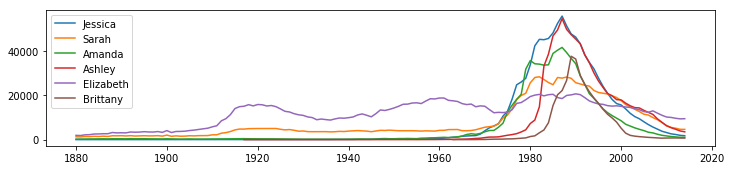

In [87]:
pp.figure(figsize=(12,2.5))

for name in popular:
    plotName('F',name)
    
pp.legend(popular)

most of these names were extremely popular but only for limited time
# this spike is a fad
#to detect this sum the squares of name frequences
#math fact: multiply function by itself increase contrast or "spikeiness"


In [90]:
all_years.groupby(['Sex','Name']).sum().head()

Number   Year
Sex Name                    
F   Aabha          21   6037
    Aabriella      10   4022
    Aaden           5   2009
    Aadhira        29   6039
    Aadhya        639  16084

In [98]:
totals = all_years.groupby(['Sex','Name'])['Number'].sum()

In [99]:
def sumSq(x):
    return sum(x**2)

In [100]:
spikeness = all_years.groupby(['Sex','Name'])['Number'].agg(sumSq) / totals**2

In [101]:
spikeness.head()

Sex  Name     
F    Aabha        0.351474
     Aabriella    0.500000
     Aaden        1.000000
     Aadhira      0.362663
     Aadhya       0.262673
Name: Number, dtype: float64

In [103]:
spiky_common = spikeness[totals > 5000].copy()
spiky_common.sort_values(ascending=False)
spiky_common.head(10)

Sex  Name    
F    Aaliyah     0.057002
     Abagail     0.041375
     Abbey       0.027334
     Abbie       0.012202
     Abbigail    0.044601
     Abby        0.023227
     Abigail     0.036547
     Abigale     0.042037
     Abigayle    0.045889
     Abril       0.052838
Name: Number, dtype: float64

In [104]:
spiky_common.tail(5)

Sex  Name     
M    Zander       0.074757
     Zane         0.027599
     Zayden       0.142075
     Zechariah    0.033064
     Zion         0.061414
Name: Number, dtype: float64

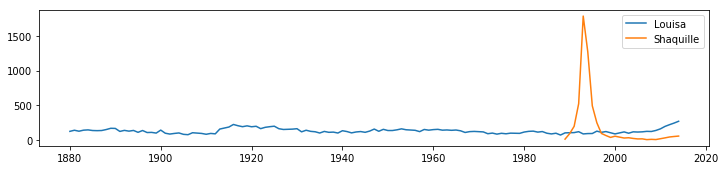

In [106]:
pp.figure(figsize=(12,2.5))

plotName('F','Louisa')
plotName('M','Shaquille')
pp.legend(['Louisa','Shaquille'])

In [107]:
fads = spiky_common.head(10).index.values

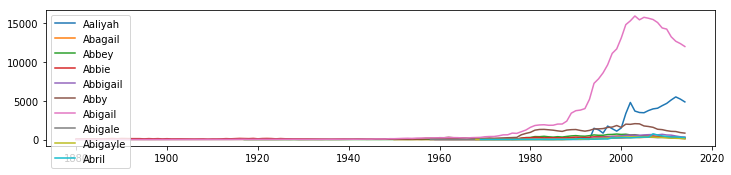

In [109]:
pp.figure(figsize=(12,2.5))

for sex,name in fads:
    plotName(sex,name)

pp.legend([name for sex,name in fads],loc='upper left')

In [112]:
totals_recent = all_years[all_years['Year'] > 2005].groupby(['Sex','Name'])['Number'].sum()

In [116]:
spiky_common = spikeness[(totals > 5000) & (totals_recent < 1000)].copy()
spiky_common.sort_values(ascending=False)
spiky_common.head(10)

Sex  Name    
F    Adell       0.016777
     Adella      0.012111
     Adria       0.016512
     Adriane     0.022747
     Adrianne    0.017954
     Agatha      0.012167
     Agnes       0.017479
     Alba        0.012251
     Alberta     0.016689
     Alecia      0.018620
Name: Number, dtype: float64

In [117]:
fads = spiky_common.head(10).index.values

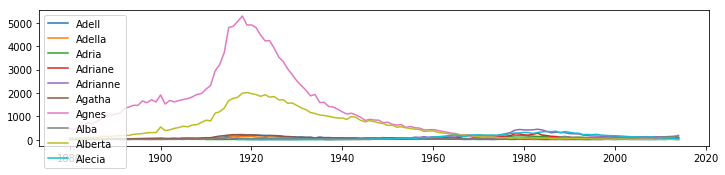

In [120]:
pp.figure(figsize=(12,2.5))

for sex,name in fads:
    plotName(sex,name)

pp.legend([name for sex,name in fads],loc='upper left')